Bitte lade alle 9 Excel-Dateien hoch:


Saving DemografischeDatenundMediennutzung.xlsx to DemografischeDatenundMediennutzung.xlsx
Saving Phase_1_ArtikeL_1.xlsx to Phase_1_ArtikeL_1.xlsx
Saving Phase_1_Artikel_2.xlsx to Phase_1_Artikel_2.xlsx
Saving Phase_1_Artikel_3.xlsx to Phase_1_Artikel_3.xlsx
Saving Phase_1_Artikel_4.xlsx to Phase_1_Artikel_4.xlsx
Saving Phase_2 _Artikel_1.xlsx to Phase_2 _Artikel_1.xlsx
Saving Phase_2_Artikel_2.xlsx to Phase_2_Artikel_2.xlsx
Saving Phase_2_Artikel_3.xlsx to Phase_2_Artikel_3.xlsx
Saving Phase_2_Artikel_4.xlsx to Phase_2_Artikel_4.xlsx
Demografische Daten: 45 Teilnehmer

=== SPALTENNAMEN IN DEMOGRAFISCHEN DATEN ===
0: ID
1: UserID
2: Haben sich Ihre Einschaetzungen zur Glaubwuerdigkeit der Artikel durch die Nutzung des KITools insgesamt veraendert?
Bitte waehlen Sie eine Aussage aus
3: Wenn sich Ihre Einschaetzungen veraendert haben In welche Richtung gingen diese Veraenderungen ueberwiegend?

4: Ich habe dem KISystem insgesamt vertraut
5: Die KI hat mich in meinen Einschaetzungen bestae

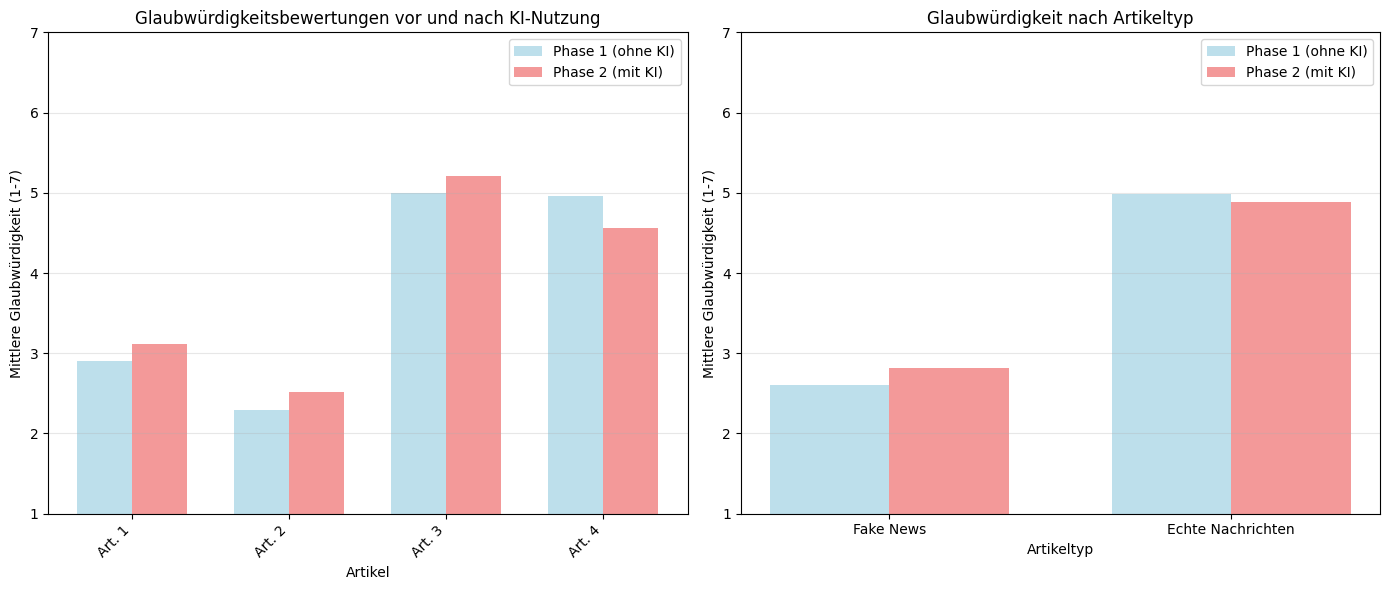


=== INDIVIDUELLE DATEN VORBEREITEN ===
Phase 1, Artikel 1: ID-Spalte = 'ID'
Phase 2, Artikel 1: ID-Spalte = 'ID'
Phase 1, Artikel 2: ID-Spalte = 'ID'
Phase 2, Artikel 2: ID-Spalte = 'ID'
Phase 1, Artikel 3: ID-Spalte = 'ID'
Phase 2, Artikel 3: ID-Spalte = 'ID'
Phase 1, Artikel 4: ID-Spalte = 'ID'
Phase 2, Artikel 4: ID-Spalte = 'ID'

Gefundene User: 59

Long-Format Datensatz: 393 Bewertungen
   UserID  Artikel   Phase Artikeltyp  Glaubwuerdigkeit
0       1        1  Phase1       Fake                 1
1       1        1  Phase2       Fake                 6
2       1        2  Phase1       Fake                 5
3       1        2  Phase2       Fake                 2
4       1        3  Phase1       Echt                 4

=== INDIVIDUELLE VERÄNDERUNGSMUSTER ===
Analysierte Bewertungspaare: 177

Veränderungsrichtungen:
Richtung
Erhöht        68
Verringert    68
Gleich        41
Name: count, dtype: int64

Prozent mit Veränderung: 76.8%

Veränderungen bei Fake News:
Richtung
Erhöht      

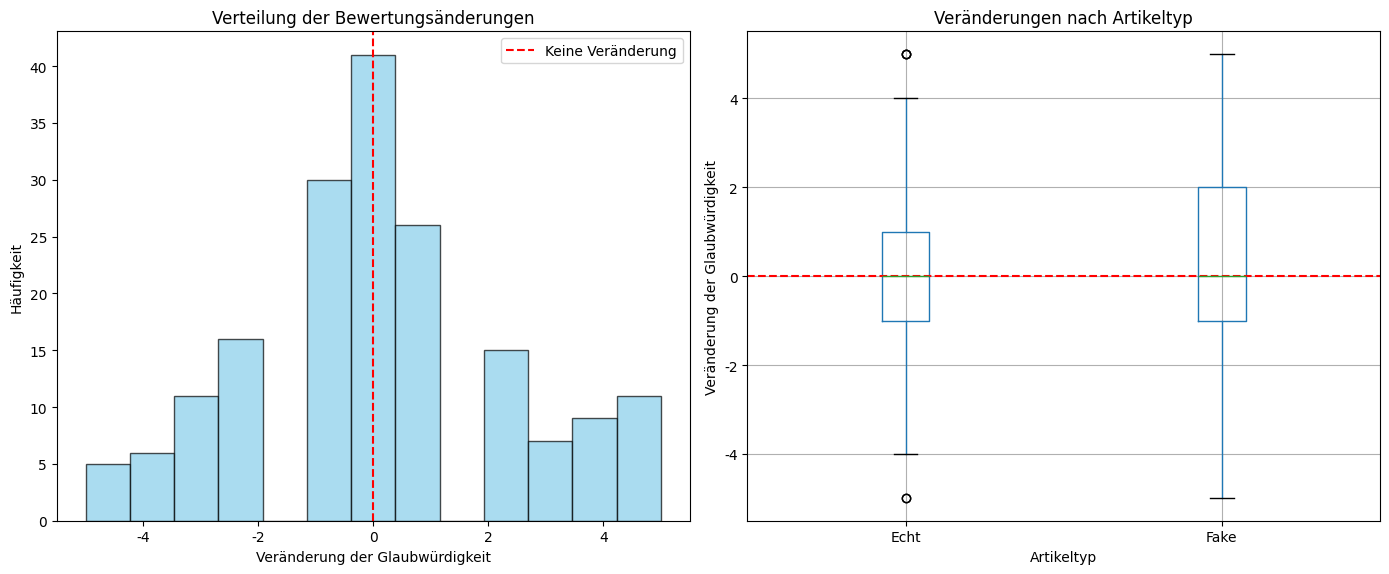


=== STATISTISCHE TESTS ===

Artikel 1 (Marine Le Pen (Fake)):
  n = 45
  Phase 1: M = 2.91 (SD = 1.65)
  Phase 2: M = 3.11 (SD = 2.01)
  t(44) = -0.492, p = 0.625
  Cohen's d = 0.109
  Interpretation: Nicht signifikant

Artikel 2 (Russland Friedensstifter (Fake)):
  n = 45
  Phase 1: M = 2.20 (SD = 1.50)
  Phase 2: M = 2.51 (SD = 1.74)
  t(44) = -0.898, p = 0.374
  Cohen's d = 0.191
  Interpretation: Nicht signifikant

Artikel 3 (Tribunal gegen Russland (Echt)):
  n = 42
  Phase 1: M = 5.00 (SD = 1.72)
  Phase 2: M = 5.36 (SD = 1.65)
  t(41) = -1.024, p = 0.312
  Cohen's d = 0.212
  Interpretation: Nicht signifikant

Artikel 4 (World Press Photo Awards (Echt)):
  n = 45
  Phase 1: M = 4.87 (SD = 1.60)
  Phase 2: M = 4.56 (SD = 2.02)
  t(44) = 1.000, p = 0.323
  Cohen's d = -0.171
  Interpretation: Nicht signifikant

=== ZUSAMMENFASSUNG DER DATEN DER BACHELORARBEIT ===

1. GESAMTEFFEKT:
   Phase 1 (ohne KI): M = 3.77 (SD = 2.00, n = 214)
   Phase 2 (mit KI): M = 3.84 (SD = 2.16, n = 17

In [1]:
# Bachelorarbeit: Quantitative Datenanalyse
# Von der Bewertung zur Verifikation: KI-gestützte Glaubwürdigkeitsbewertung

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Deutsches Plotting
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# %% [markdown]
# ## 1. Daten einlesen und Spaltennamen prüfen

# %%
# Für Google Colab: Dateien hochladen
from google.colab import files
print("Bitte lade alle 9 Excel-Dateien hoch:")
uploaded = files.upload()

# %%
# Alle Dateinamen definieren
files_dict = {
    'demo': 'DemografischeDatenundMediennutzung.xlsx',
    'p1_a1': 'Phase_1_ArtikeL_1.xlsx',
    'p1_a2': 'Phase_1_Artikel_2.xlsx',
    'p1_a3': 'Phase_1_Artikel_3.xlsx',
    'p1_a4': 'Phase_1_Artikel_4.xlsx',
    'p2_a1': 'Phase_2 _Artikel_1.xlsx',
    'p2_a2': 'Phase_2_Artikel_2.xlsx',
    'p2_a3': 'Phase_2_Artikel_3.xlsx',
    'p2_a4': 'Phase_2_Artikel_4.xlsx'
}

# %%
# Demografische Daten laden und Spalten anzeigen
df_demo = pd.read_excel(files_dict['demo'])
print(f"Demografische Daten: {df_demo.shape[0]} Teilnehmer")
print("\n=== SPALTENNAMEN IN DEMOGRAFISCHEN DATEN ===")
for i, col in enumerate(df_demo.columns):
    print(f"{i}: {col}")

# %%
# Phase 1 Daten laden
phase1_data = {}
for i in range(1, 5):
    phase1_data[f'artikel_{i}'] = pd.read_excel(files_dict[f'p1_a{i}'])
    print(f"\nPhase 1, Artikel {i}: {phase1_data[f'artikel_{i}'].shape[0]} Bewertungen")
    print("Erste 5 Spalten:", list(phase1_data[f'artikel_{i}'].columns[:5]))

# Phase 2 Daten laden
phase2_data = {}
for i in range(1, 5):
    phase2_data[f'artikel_{i}'] = pd.read_excel(files_dict[f'p2_a{i}'])
    print(f"\nPhase 2, Artikel {i}: {phase2_data[f'artikel_{i}'].shape[0]} Bewertungen")

# %% [markdown]
# ## 2. Spaltennamen identifizieren und anpassen

# %%
# Finde die richtige Alter-Spalte
alter_spalte = None
for col in df_demo.columns:
    if 'Alter' in col or 'alter' in col:
        alter_spalte = col
        print(f"Gefundene Alter-Spalte: '{col}'")
        break

# Finde die richtige Geschlecht-Spalte
geschlecht_spalte = None
for col in df_demo.columns:
    if 'Geschlecht' in col or 'geschlecht' in col:
        geschlecht_spalte = col
        print(f"Gefundene Geschlecht-Spalte: '{col}'")
        break

# Finde die richtige Bildungs-Spalte
bildung_spalte = None
for col in df_demo.columns:
    if 'Bildung' in col or 'bildung' in col or 'Abschluss' in col:
        bildung_spalte = col
        print(f"Gefundene Bildungs-Spalte: '{col}'")
        break

# %% [markdown]
# ## 3. Datenbereinigung

# %%
# Funktion zum Bereinigen der Glaubwürdigkeitsdaten
def clean_glaubwuerdigkeit(df):
    """Extrahiert Glaubwürdigkeitswerte und bereinigt sie"""
    # Spalte mit Glaubwürdigkeit finden
    glaubw_col = None
    for col in df.columns:
        if 'glaubw' in col.lower() or 'glaubwürdig' in col.lower():
            glaubw_col = col
            break

    if glaubw_col is None:
        print("Warnung: Keine Glaubwürdigkeitsspalte gefunden!")
        print("Verfügbare Spalten:", df.columns.tolist())
        return df

    print(f"Verwende Spalte: '{glaubw_col}'")

    # Konvertiere zu numerisch
    df['glaubwuerdigkeit_clean'] = pd.to_numeric(df[glaubw_col], errors='coerce')

    # Entferne ungültige Werte
    df = df[df['glaubwuerdigkeit_clean'].notna()]
    df = df[(df['glaubwuerdigkeit_clean'] >= 1) & (df['glaubwuerdigkeit_clean'] <= 7)]

    return df

# Bereinige alle Datensätze
print("\n=== DATENBEREINIGUNG ===")
for key in phase1_data:
    print(f"\n{key}:")
    phase1_data[key] = clean_glaubwuerdigkeit(phase1_data[key])
    phase2_data[key] = clean_glaubwuerdigkeit(phase2_data[key])

# %% [markdown]
# ## 4. Deskriptive Statistik

# %%
# 4.1 Demografische Übersicht
print("=== STICHPROBENBESCHREIBUNG ===\n")

# Geschlechterverteilung
if geschlecht_spalte:
    geschlecht = df_demo[geschlecht_spalte].value_counts()
    print("Geschlechterverteilung:")
    print(geschlecht)

# Alter
if alter_spalte:
    alter_data = pd.to_numeric(df_demo[alter_spalte], errors='coerce')
    alter_data = alter_data.dropna()
    print(f"\nAlter: M = {alter_data.mean():.1f}, SD = {alter_data.std():.1f}")
    print(f"Range: {alter_data.min():.0f} - {alter_data.max():.0f}")

# Bildung
if bildung_spalte:
    bildung = df_demo[bildung_spalte].value_counts()
    print("\nBildungsverteilung:")
    print(bildung)

# Politische Orientierung - suche die Spalte
pol_spalte = None
for col in df_demo.columns:
    if 'politisch' in col.lower():
        pol_spalte = col
        break

if pol_spalte:
    pol_orient = pd.to_numeric(df_demo[pol_spalte], errors='coerce').dropna()
    print(f"\nPolitische Orientierung (1=links, 11=rechts): M = {pol_orient.mean():.1f}, SD = {pol_orient.std():.1f}")

# %% [markdown]
# ## 5. Vorher-Nachher-Vergleich (Hauptanalyse für RQ3)

# %%
# 5.1 Glaubwürdigkeitswerte pro Phase und Artikel
results_summary = pd.DataFrame()

artikel_namen = {
    1: "Marine Le Pen (Fake)",
    2: "Russland Friedensstifter (Fake)",
    3: "Tribunal gegen Russland (Echt)",
    4: "World Press Photo Awards (Echt)"
}

for i in range(1, 5):
    if 'glaubwuerdigkeit_clean' in phase1_data[f'artikel_{i}'].columns:
        phase1_mean = phase1_data[f'artikel_{i}']['glaubwuerdigkeit_clean'].mean()
        phase1_std = phase1_data[f'artikel_{i}']['glaubwuerdigkeit_clean'].std()
        phase1_n = len(phase1_data[f'artikel_{i}'])
    else:
        print(f"Warnung: Keine bereinigten Daten für Phase 1, Artikel {i}")
        continue

    if 'glaubwuerdigkeit_clean' in phase2_data[f'artikel_{i}'].columns:
        phase2_mean = phase2_data[f'artikel_{i}']['glaubwuerdigkeit_clean'].mean()
        phase2_std = phase2_data[f'artikel_{i}']['glaubwuerdigkeit_clean'].std()
        phase2_n = len(phase2_data[f'artikel_{i}'])
    else:
        print(f"Warnung: Keine bereinigten Daten für Phase 2, Artikel {i}")
        continue

    diff = phase2_mean - phase1_mean

    new_row = pd.DataFrame({
        'Artikel': [artikel_namen[i]],
        'Phase1_M': [phase1_mean],
        'Phase1_SD': [phase1_std],
        'Phase1_N': [phase1_n],
        'Phase2_M': [phase2_mean],
        'Phase2_SD': [phase2_std],
        'Phase2_N': [phase2_n],
        'Differenz': [diff],
        'Artikel_Typ': ['Fake' if i <= 2 else 'Echt']
    })
    results_summary = pd.concat([results_summary, new_row], ignore_index=True)

print("\n=== GLAUBWÜRDIGKEITSBEWERTUNGEN VORHER-NACHHER ===")
print(results_summary.round(2))

# %%
# 5.2 Visualisierung Vorher-Nachher
if len(results_summary) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Alle Artikel
    x = np.arange(len(results_summary))
    width = 0.35

    ax1.bar(x - width/2, results_summary['Phase1_M'], width, label='Phase 1 (ohne KI)', alpha=0.8, color='lightblue')
    ax1.bar(x + width/2, results_summary['Phase2_M'], width, label='Phase 2 (mit KI)', alpha=0.8, color='lightcoral')
    ax1.set_xlabel('Artikel')
    ax1.set_ylabel('Mittlere Glaubwürdigkeit (1-7)')
    ax1.set_title('Glaubwürdigkeitsbewertungen vor und nach KI-Nutzung')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f"Art. {i+1}" for i in range(len(results_summary))], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim(1, 7)

    # Plot 2: Nach Artikeltyp gruppiert
    fake_data = results_summary[results_summary['Artikel_Typ'] == 'Fake']
    echt_data = results_summary[results_summary['Artikel_Typ'] == 'Echt']

    if len(fake_data) > 0 and len(echt_data) > 0:
        fake_phase1 = fake_data['Phase1_M'].mean()
        fake_phase2 = fake_data['Phase2_M'].mean()
        echt_phase1 = echt_data['Phase1_M'].mean()
        echt_phase2 = echt_data['Phase2_M'].mean()

        x2 = np.arange(2)
        ax2.bar(x2 - width/2, [fake_phase1, echt_phase1], width, label='Phase 1 (ohne KI)', alpha=0.8, color='lightblue')
        ax2.bar(x2 + width/2, [fake_phase2, echt_phase2], width, label='Phase 2 (mit KI)', alpha=0.8, color='lightcoral')
        ax2.set_xlabel('Artikeltyp')
        ax2.set_ylabel('Mittlere Glaubwürdigkeit (1-7)')
        ax2.set_title('Glaubwürdigkeit nach Artikeltyp')
        ax2.set_xticks(x2)
        ax2.set_xticklabels(['Fake News', 'Echte Nachrichten'])
        ax2.legend()
        ax2.grid(axis='y', alpha=0.3)
        ax2.set_ylim(1, 7)

    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 6. Individuelle Veränderungsmuster

# %%
# 6.1 Long-Format für individuelle Analysen erstellen
print("\n=== INDIVIDUELLE DATEN VORBEREITEN ===")

# Finde die ID/Name Spalten
id_spalten_p1 = {}
id_spalten_p2 = {}

for i in range(1, 5):
    # Phase 1
    for col in phase1_data[f'artikel_{i}'].columns:
        if 'Name' in col or 'ID' in col or 'UserID' in col:
            id_spalten_p1[i] = col
            print(f"Phase 1, Artikel {i}: ID-Spalte = '{col}'")
            break

    # Phase 2
    for col in phase2_data[f'artikel_{i}'].columns:
        if 'Name' in col or 'ID' in col or 'UserID' in col:
            id_spalten_p2[i] = col
            print(f"Phase 2, Artikel {i}: ID-Spalte = '{col}'")
            break

# %%
# Erstelle Long-Format Datensatz
data_long = []

# Sammle alle User-IDs
all_users = set()
for i in range(1, 5):
    if i in id_spalten_p1:
        all_users.update(phase1_data[f'artikel_{i}'][id_spalten_p1[i]].unique())
    if i in id_spalten_p2:
        all_users.update(phase2_data[f'artikel_{i}'][id_spalten_p2[i]].unique())

print(f"\nGefundene User: {len(all_users)}")

# Sammle Daten für jeden User
for user_id in all_users:
    for artikel in range(1, 5):
        # Phase 1
        if artikel in id_spalten_p1 and 'glaubwuerdigkeit_clean' in phase1_data[f'artikel_{artikel}'].columns:
            user_data_p1 = phase1_data[f'artikel_{artikel}'][
                phase1_data[f'artikel_{artikel}'][id_spalten_p1[artikel]] == user_id
            ]
            if len(user_data_p1) > 0:
                data_long.append({
                    'UserID': user_id,
                    'Artikel': artikel,
                    'Phase': 'Phase1',
                    'Artikeltyp': 'Fake' if artikel <= 2 else 'Echt',
                    'Glaubwuerdigkeit': user_data_p1['glaubwuerdigkeit_clean'].iloc[0]
                })

        # Phase 2
        if artikel in id_spalten_p2 and 'glaubwuerdigkeit_clean' in phase2_data[f'artikel_{artikel}'].columns:
            user_data_p2 = phase2_data[f'artikel_{artikel}'][
                phase2_data[f'artikel_{artikel}'][id_spalten_p2[artikel]] == user_id
            ]
            if len(user_data_p2) > 0:
                data_long.append({
                    'UserID': user_id,
                    'Artikel': artikel,
                    'Phase': 'Phase2',
                    'Artikeltyp': 'Fake' if artikel <= 2 else 'Echt',
                    'Glaubwuerdigkeit': user_data_p2['glaubwuerdigkeit_clean'].iloc[0]
                })

df_long = pd.DataFrame(data_long)
print(f"\nLong-Format Datensatz: {len(df_long)} Bewertungen")
print(df_long.head())

# %%
# 6.2 Veränderungsmuster analysieren
if len(df_long) > 0:
    # Pivot für Veränderungsanalyse
    df_wide = df_long.pivot_table(
        index=['UserID', 'Artikel', 'Artikeltyp'],
        columns='Phase',
        values='Glaubwuerdigkeit'
    ).reset_index()

    # Berechne Veränderungen
    df_wide['Veraenderung'] = df_wide['Phase2'] - df_wide['Phase1']
    df_wide['Richtung'] = df_wide['Veraenderung'].apply(
        lambda x: 'Erhöht' if x > 0 else ('Verringert' if x < 0 else 'Gleich') if pd.notna(x) else None
    )

    # Filtere vollständige Paare
    df_changes = df_wide.dropna(subset=['Phase1', 'Phase2'])

    print("\n=== INDIVIDUELLE VERÄNDERUNGSMUSTER ===")
    print(f"Analysierte Bewertungspaare: {len(df_changes)}")
    print("\nVeränderungsrichtungen:")
    print(df_changes['Richtung'].value_counts())
    print(f"\nProzent mit Veränderung: {(df_changes['Richtung'] != 'Gleich').mean() * 100:.1f}%")

    # Nach Artikeltyp
    print("\nVeränderungen bei Fake News:")
    fake_changes = df_changes[df_changes['Artikeltyp'] == 'Fake']
    if len(fake_changes) > 0:
        print(fake_changes['Richtung'].value_counts())
        print(f"Mittlere Veränderung: {fake_changes['Veraenderung'].mean():.2f}")

    print("\nVeränderungen bei echten Nachrichten:")
    echt_changes = df_changes[df_changes['Artikeltyp'] == 'Echt']
    if len(echt_changes) > 0:
        print(echt_changes['Richtung'].value_counts())
        print(f"Mittlere Veränderung: {echt_changes['Veraenderung'].mean():.2f}")

# %%
# 6.3 Visualisierung der Veränderungen
if len(df_changes) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramm
    ax1.hist(df_changes['Veraenderung'], bins=13, edgecolor='black', alpha=0.7, color='skyblue')
    ax1.set_xlabel('Veränderung der Glaubwürdigkeit')
    ax1.set_ylabel('Häufigkeit')
    ax1.set_title('Verteilung der Bewertungsänderungen')
    ax1.axvline(x=0, color='red', linestyle='--', label='Keine Veränderung')
    ax1.legend()

    # Boxplot
    df_changes.boxplot(column='Veraenderung', by='Artikeltyp', ax=ax2)
    ax2.set_ylabel('Veränderung der Glaubwürdigkeit')
    ax2.set_title('Veränderungen nach Artikeltyp')
    ax2.axhline(y=0, color='red', linestyle='--')
    plt.suptitle('')  # Remove automatic title

    plt.tight_layout()
    plt.show()

# %% [markdown]
# ## 7. Statistische Tests

# %%
# T-Tests für jeden Artikel
if len(df_changes) > 0:
    print("\n=== STATISTISCHE TESTS ===")

    for i in range(1, 5):
        artikel_data = df_changes[df_changes['Artikel'] == i]
        if len(artikel_data) > 10:  # Mindestens 10 Paare für t-Test
            t_stat, p_val = stats.ttest_rel(artikel_data['Phase1'], artikel_data['Phase2'])
            cohen_d = (artikel_data['Phase2'].mean() - artikel_data['Phase1'].mean()) / np.sqrt(
                (artikel_data['Phase1'].std()**2 + artikel_data['Phase2'].std()**2) / 2
            )

            print(f"\nArtikel {i} ({artikel_namen[i]}):")
            print(f"  n = {len(artikel_data)}")
            print(f"  Phase 1: M = {artikel_data['Phase1'].mean():.2f} (SD = {artikel_data['Phase1'].std():.2f})")
            print(f"  Phase 2: M = {artikel_data['Phase2'].mean():.2f} (SD = {artikel_data['Phase2'].std():.2f})")
            print(f"  t({len(artikel_data)-1}) = {t_stat:.3f}, p = {p_val:.3f}")
            print(f"  Cohen's d = {cohen_d:.3f}")
            print(f"  Interpretation: {'Signifikant' if p_val < 0.05 else 'Nicht signifikant'}")

# %% [markdown]
# ## 8. Zusammenfassung für die Bachelorarbeit

# %%
print("\n=== ZUSAMMENFASSUNG DER DATEN DER BACHELORARBEIT ===\n")

if len(df_long) > 0:
    # Gesamteffekt
    overall_stats = df_long.groupby('Phase')['Glaubwuerdigkeit'].agg(['mean', 'std', 'count'])
    if 'Phase1' in overall_stats.index and 'Phase2' in overall_stats.index:
        print("1. GESAMTEFFEKT:")
        print(f"   Phase 1 (ohne KI): M = {overall_stats.loc['Phase1', 'mean']:.2f} (SD = {overall_stats.loc['Phase1', 'std']:.2f}, n = {overall_stats.loc['Phase1', 'count']})")
        print(f"   Phase 2 (mit KI): M = {overall_stats.loc['Phase2', 'mean']:.2f} (SD = {overall_stats.loc['Phase2', 'std']:.2f}, n = {overall_stats.loc['Phase2', 'count']})")
        print(f"   Differenz: {overall_stats.loc['Phase2', 'mean'] - overall_stats.loc['Phase1', 'mean']:.2f}")

if len(results_summary) > 0:
    print("\n2. ARTIKELSPEZIFISCHE EFFEKTE:")
    for _, row in results_summary.iterrows():
        print(f"   {row['Artikel']}: {row['Phase1_M']:.2f} → {row['Phase2_M']:.2f} (Δ = {row['Differenz']:.2f})")

if len(df_changes) > 0:
    print("\n3. INDIVIDUELLE VERÄNDERUNGEN:")
    print(f"   Analysierte Bewertungspaare: {len(df_changes)}")
    print(f"   Davon verändert: {(df_changes['Richtung'] != 'Gleich').sum()} ({(df_changes['Richtung'] != 'Gleich').mean()*100:.1f}%)")
    print(f"   - Erhöht: {(df_changes['Richtung'] == 'Erhöht').sum()}")
    print(f"   - Verringert: {(df_changes['Richtung'] == 'Verringert').sum()}")
    print(f"   - Unverändert: {(df_changes['Richtung'] == 'Gleich').sum()}")

# %%
# Speichere Ergebnisse
if len(results_summary) > 0:
    results_summary.to_csv('vorher_nachher_zusammenfassung.csv', index=False)
    print("\n Zusammenfassung gespeichert als 'vorher_nachher_zusammenfassung.csv'")

if len(df_changes) > 0:
    df_changes.to_csv('individuelle_veraenderungen.csv', index=False)
    print("Individuelle Veränderungen gespeichert als 'individuelle_veraenderungen.csv'")

print("\n Analyse abgeschlossen!")
